In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
dataset = datasets.load_breast_cancer()

In [3]:
X = pd.DataFrame(dataset["data"], columns=dataset["feature_names"])
y = dataset["target"]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model = model.fit(x_train, y_train)

In [5]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {auc:.4f}")

ROC AUC: 0.9912


In [6]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test, y_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


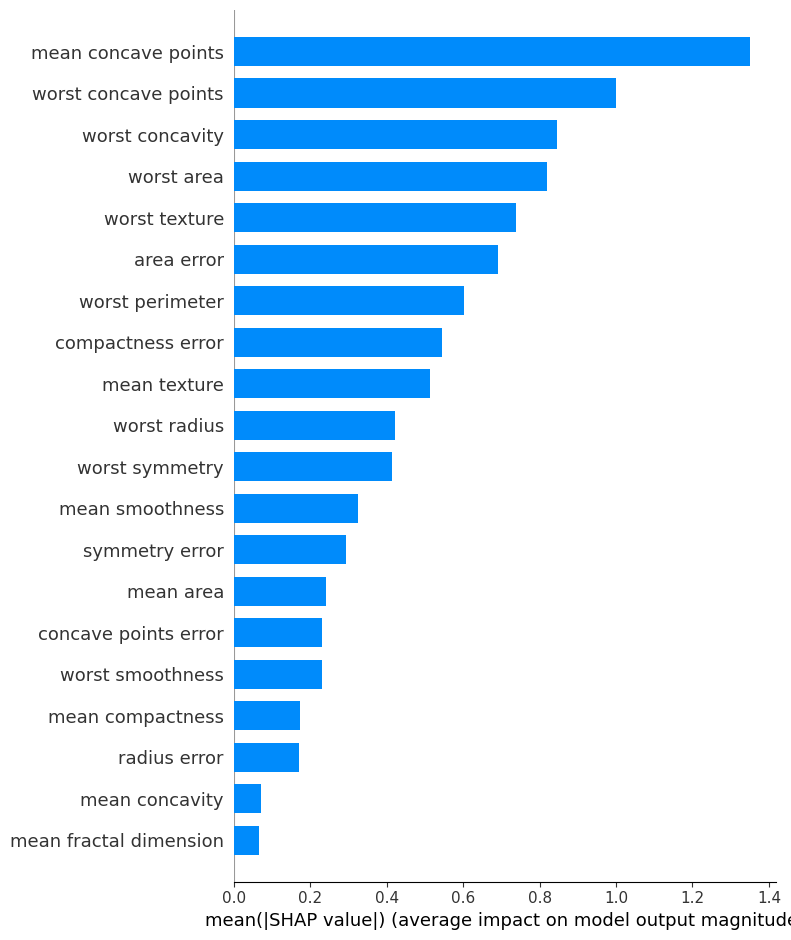

In [7]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


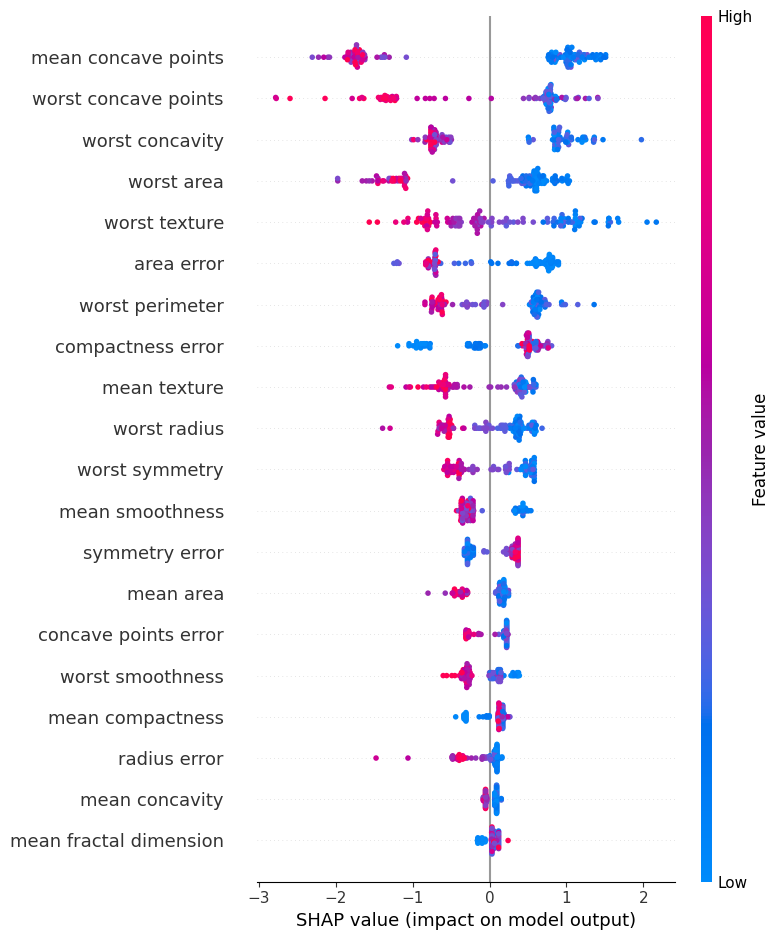

In [8]:
shap.summary_plot(shap_values, x_test)

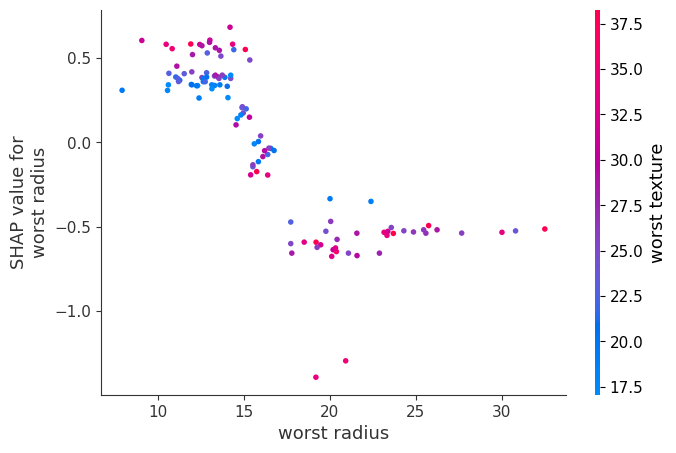

In [9]:
shap.dependence_plot(20, shap_values, x_test)

In [10]:
from IPython.display import HTML


shap.initjs()

def white_force_plot(*args, **kwargs):
    """Wrapper aroung force_plot to correctly plot on dark backgrounds."""
    force_plot = shap.force_plot(*args, **kwargs)
    return HTML(f"<div style='background-color:white;'>{shap.getjs() + force_plot.html()}</div>")

In [11]:
white_force_plot(explainer.expected_value, shap_values[0], x_test.iloc[0])

In [12]:
white_force_plot(explainer.expected_value, shap_values, X, plot_cmap="seaborn.dark")

In [13]:
shap_interaction_values = explainer.shap_interaction_values(x_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


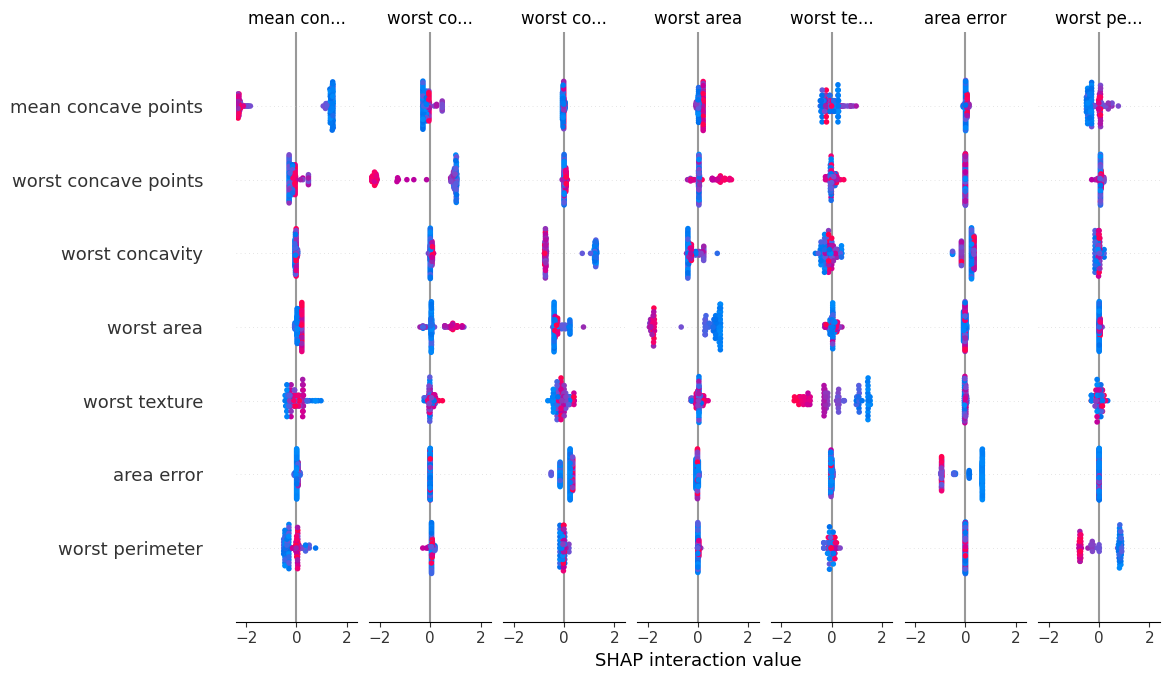

In [14]:
shap.summary_plot(shap_interaction_values, x_test)

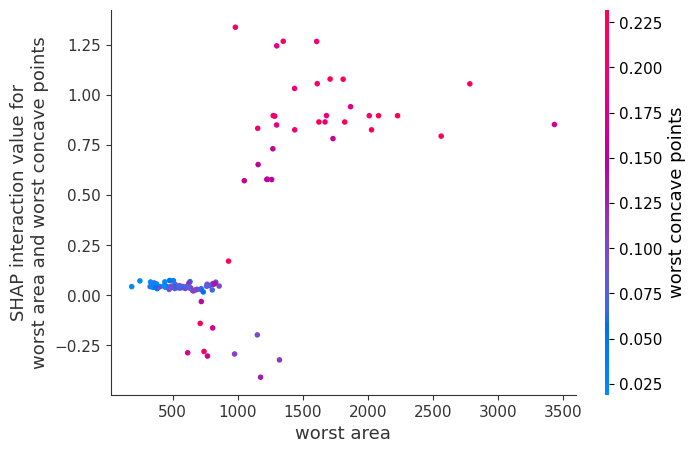

In [15]:
shap.dependence_plot(("worst area", "worst concave points"), shap_interaction_values, x_test)